In [5]:
import pandas as pd

In [6]:
data=pd.read_csv('TIR_all.csv')

In [7]:
# sorting by CLV segment and revenue
data= data.sort_values(by=['Customer_segment','Revenue'], ascending= True)

In [8]:
data.tail()

,Unnamed: 0,Proposition,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,...,Ins_holders,Inv_holders,Mort_holders,Involvement,T_rank_norm,I_rank_norm,R_rank_norm,S_rank_norm,TIR_Score,Customer_segment
12765,12765,2. Silver,1. Primary,3,2. 25 - 35,0,1,1,0,1,...,0,1240,1240,5,42.857733,85.882481,100.0,100.000000,9.309427,Top Customers
13055,13055,2. Silver,1. Primary,3,6. 65+,1,1,1,0,1,...,0,1240,1240,6,42.857733,96.862774,100.0,20.000868,8.656619,Top Customers
13215,13215,2. Silver,1. Primary,3,5. 55 - 65,1,1,0,0,0,...,0,0,1240,4,42.857733,63.921896,100.0,100.000000,8.731863,Top Customers
13432,13432,2. Silver,1. Primary,3,4. 45 - 55,1,1,1,0,0,...,0,0,1240,5,42.857733,85.882481,100.0,60.000434,8.838632,Top Customers
13607,13607,2. Silver,1. Primary,3,3. 35-45,1,1,0,0,1,...,0,1240,1240,5,42.857733,85.882481,100.0,20.000868,8.367837,Top Customers


In [9]:
data['Customer_segment'] = data['Customer_segment'].str.replace(r'Lost Customers','1')
data['Customer_segment'] = data['Customer_segment'].str.replace(r'Low Value Customers','2')
data['Customer_segment'] = data['Customer_segment'].str.replace(r'Medium Value Customer','3')
data['Customer_segment'] = data['Customer_segment'].str.replace(r'High value Customer','3')
data['Customer_segment'] = data['Customer_segment'].str.replace(r'Top Customers','5')

In [10]:
data['Value']= data['Revenue'].cumsum()/data['Revenue'].sum()

In [11]:
data['customer_prop']= data['Numcust'].cumsum()/data["Numcust"].sum()
data['customer_prop']= data['customer_prop'].sort_values(ascending= False)

In [12]:
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

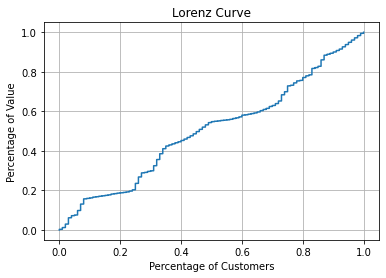

In [13]:
import matplotlib.pyplot as plt
 
x  = data["customer_prop"]
y = data["Value"]

plt.plot(round(x,2), y)
plt.plot()

plt.xlabel("Percentage of Customers")
plt.grid()
plt.ylabel("Percentage of Value")
plt.title("Lorenz Curve")

plt.show()

In [14]:
y=sorted(y)
x=sorted(x)

In [15]:
x=np.array(x)
y=np.array(y)

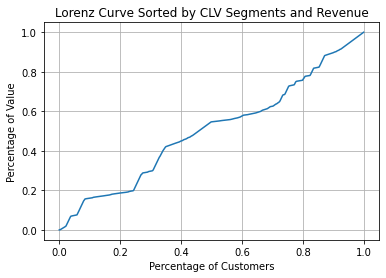

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
 
# x  = proposition["customer_prop"]
# y = proposition["Value"]

X_Y_Spline = make_interp_spline(x, y)

X_ = np.linspace(x.min(), x.max(), 500)

Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.plot()

plt.xlabel("Percentage of Customers")
plt.grid()
plt.ylabel("Percentage of Value")
plt.title("Lorenz Curve Sorted by CLV Segments and Revenue")

plt.show()